In [1]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_model_name(x):
    if x['model'] == 'TsDsae' and x['kl_reg']:
        return 'TsDsae'
    elif x['model'] == 'TsDsae' and not x['kl_reg']:
        return 'TsDsae w/o reg'
    elif x['model'] == 'Dsae':
        return 'Dsae'
    elif x['model'] == 'FreezeDsae':
        return 'Dsae-f'

In [6]:
def get_data(dpath='../benchmark/Urmp'):
    list_d_flat = []
    for p in list(Path(dpath).glob('*.json')):
        d_flat = {}
        with open(p) as f:
            d = json.load(f)
        for k in d.keys():
            if k not in ['optim', 'params', 'swap_n_clfr']:
                d_flat[k] = d[k]
        for k, v in d['params'].items():
            d_flat[k] = v
        d_flat['amsgrad'] = d['optim']['amsgrad']
        d_flat['pre_swap'] = d['swap_n_clfr']['lda-pre_swap']
        d_flat['gswap'] = d['swap_n_clfr']['lda-gswap']
        d_flat['lswap'] = d['swap_n_clfr']['lda-lswap']
        list_d_flat.append(d_flat)
    df = pd.DataFrame(list_d_flat)
    df['kl_reg'] = df.apply(
        lambda x: sum(x['kl_reg']) > 0
        if isinstance(x['kl_reg'], list) else False, axis=1
    )
    df['model'] = df.apply(lambda x: get_model_name(x), axis=1)
    return df

In [4]:
def plot_benchmark(df, legend=True):
    models = ['Dsae', 'Dsae-f', 'TsDsae w/o reg', 'TsDsae']
    colors = ['gray', 'cyan', 'orange', 'red']
    palette = {m: c for m, c in zip(models, colors)}
    fig, ax = plt.subplots(1, 3, figsize=(3*3, 1*3), sharey=True)
    for n, y in enumerate(['pre_swap', 'gswap', 'lswap']):
        g = sns.boxplot(
            data=df, ax=ax[n], x='z_dim', y=y, hue='model', hue_order=models,
            palette=palette
        )
        g.get_legend().remove()
        g.set_xlabel(g.get_xlabel(), fontsize=20)
        g.set_ylabel(g.get_ylabel(), fontsize=20)
        g.set_xticklabels(g.get_xticklabels(), fontsize=15)
    if legend:
        handles, labels = g.get_legend_handles_labels()
        fig.legend(
            handles, labels,
            loc='upper center', ncol=len(models), bbox_to_anchor=(0.5, 1.15),
            fontsize=15
        )
    plt.tight_layout()

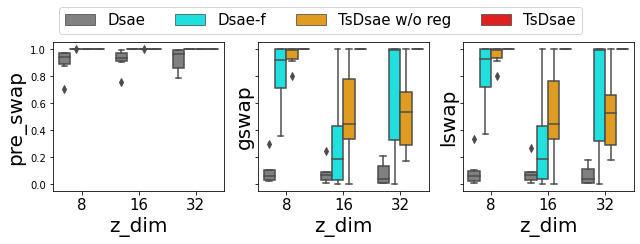

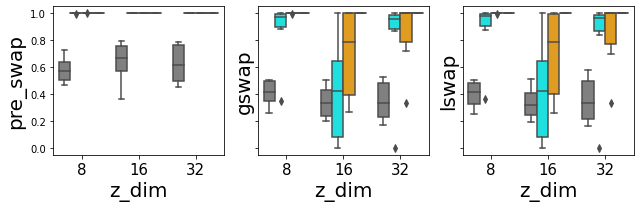

In [10]:
df = get_data('../benchmark/DMelodies')
plot_benchmark(df[df['amsgrad'] == False], True)
plot_benchmark(df[df['amsgrad']== True], False)

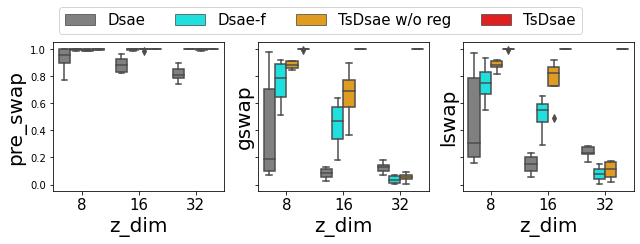

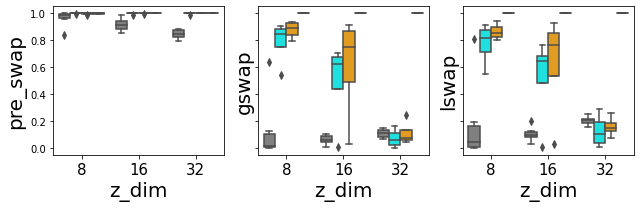

In [11]:
df = get_data('../benchmark/Urmp')
plot_benchmark(df[df['amsgrad'] == False], True)
plot_benchmark(df[df['amsgrad']== True], False)